In [1]:
import pickle, bz2
import random
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from utils import visualize_trajectory, create_dataset, get_all_trajectories

# Load Data

In [2]:
# Load original data
raw_trajs = pickle.load(open('./dataset/trajs_without_speed500.pkl', 'rb'))
plates = pickle.load(open('./dataset/plates.pkl', 'rb'))

# Visualize Trajectory Data

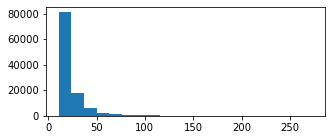

In [3]:
# Check the histogram of all trajectories to 
# decide the padding length
plate_indices = list(range(500))
days = list(range(10))
traj_types = ["seek", "serve"]

# Get desired trajectories
result_trajs = get_all_trajectories(raw_trajs, plates, plate_indices, days, traj_types)

# Collect all path lengths
path_lengths = []
for plate_trajs in result_trajs:
    for day_trajs in plate_trajs:
        for traj in day_trajs:
            path_lengths.append(len(traj))

# Plot histogram
plt.figure(figsize=(5, 2))
_ = plt.hist(path_lengths, bins=20)

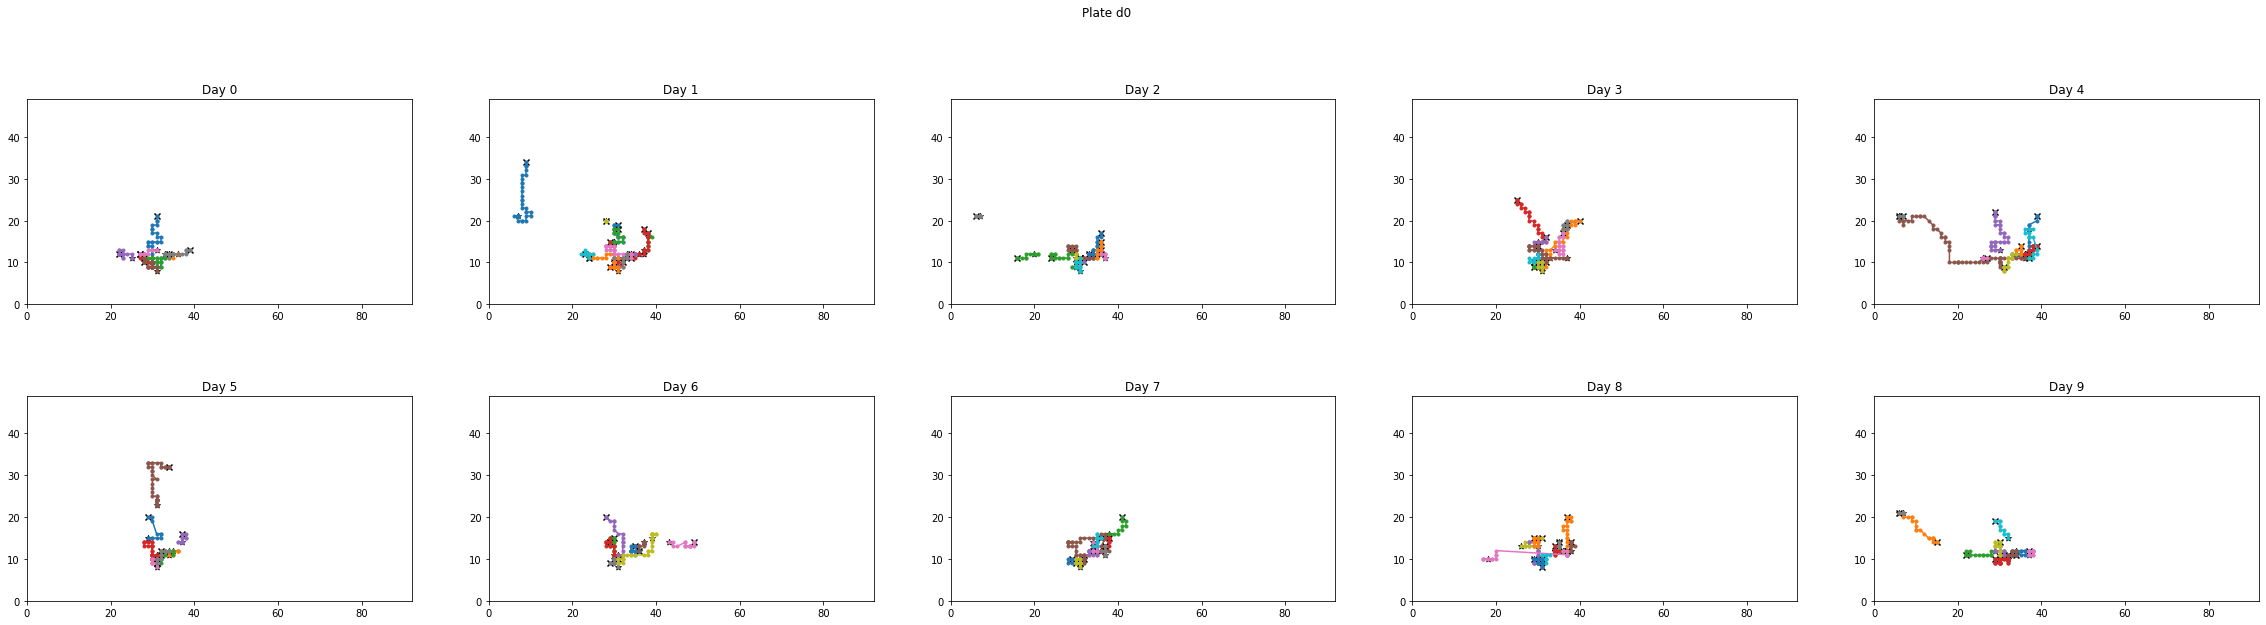

In [4]:
# Displaying trajectories of drivers on given days
plate_indices = [0]
days = list(range(10))
traj_types = ["seek"]

# Get desired trajectories
result_trajs = get_all_trajectories(raw_trajs, plates, plate_indices, days, traj_types)

# Draw a 2x5 figure of each driver's 10 day's trajectories
for plate in range(len(plate_indices)):
    plt.figure(figsize=(40, 10))
    plt.suptitle('Plate {}'.format(plates[plate_indices[plate]]))

    for day in range(len(days)):
        plt.subplot(2, 5, day+1)
        plt.title('Day {}'.format(days[day]))
        for traj in result_trajs[plate][day]:
            visualize_trajectory(np.array(traj))

# Create Data Set

In [5]:
seed = 0
random.seed(seed)
np.random.seed(seed)


# Hyper-parameter
from argument import create_parser
parser = create_parser()
opts = parser.parse_args(args=[])

num_trajs = 10
padding_length = 60
num_training_sample = 200000 #0
num_testing_seen_sample = 10000
num_testing_unseen_sample = 10000
pos_ratio = 0.5

# Create training dataset
X_train, y_train = create_dataset(raw_trajs, plates, num_training_sample, 
                                  plate_indices=list(range(opts.num_plates)), 
                                  selected_days=list(range(opts.num_days)), 
                                  traj_type=opts.traj_type, num_trajs=num_trajs,
                                  padding_length=padding_length, pos_ratio=pos_ratio)
# Create testing dataset 1 (seen plates and unseen days)
X_test_seen, y_test_seen = create_dataset(raw_trajs, plates, num_testing_seen_sample, 
                                          plate_indices=list(range(opts.num_plates)), 
                                          selected_days=[8, 9], 
                                          traj_type=opts.traj_type, num_trajs=num_trajs,
                                          padding_length=padding_length, pos_ratio=pos_ratio)
# Create testing dataset 2 (unseen plates)
X_test_unseen, y_test_unseen = create_dataset(raw_trajs, plates, num_testing_unseen_sample, 
                                              plate_indices=list(range( 2000, 2197 )), 
                                              selected_days=[8, 9], 
                                              traj_type=opts.traj_type, num_trajs=num_trajs,
                                              padding_length=padding_length, pos_ratio=pos_ratio)

print(X_train.shape)
print(y_train.shape)
print(X_test_seen.shape)
print(y_test_seen.shape)
print(X_test_unseen.shape)
print(y_test_unseen.shape)


# Save the datasets
pickle.dump([X_train.astype(int), y_train.astype(int)], bz2.open('./dataset/training_set.pkl', 'wb'))
pickle.dump([X_test_seen.astype(int), y_test_seen.astype(int)], bz2.open('./dataset/testing_set_seen.pkl', 'wb'))
pickle.dump([X_test_unseen.astype(int), y_test_unseen.astype(int)], bz2.open('./dataset/testing_set_unseen.pkl', 'wb'))

(200000, 20, 60, 3)
(200000,)
(10000, 20, 60, 3)
(10000,)
(10000, 20, 60, 3)
(10000,)


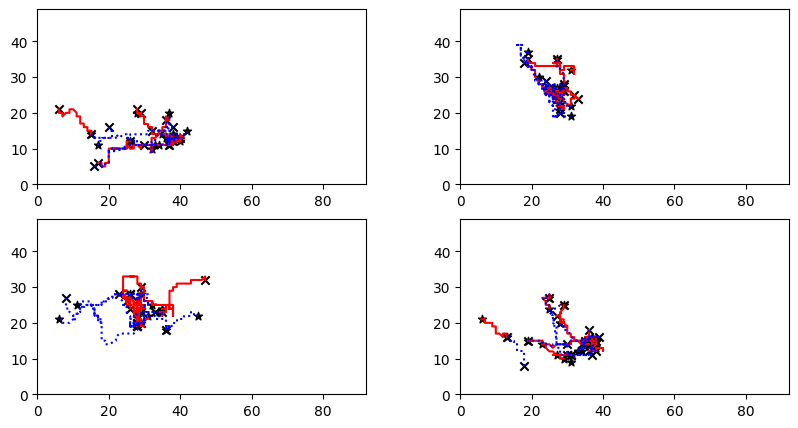

In [6]:
# Plot the first 4 samples of the training set
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.subplot(2, 2, i+1)

    # Plot each trajectory
    for j, traj in enumerate(X_train[i, :, :, :]):
        # plot the 10 trajectories of the first plate
        if j < 10:
            visualize_trajectory(traj, 'r-')
        # plot the 10 trajectories of the second plate
        else:
            visualize_trajectory(traj, 'b:')